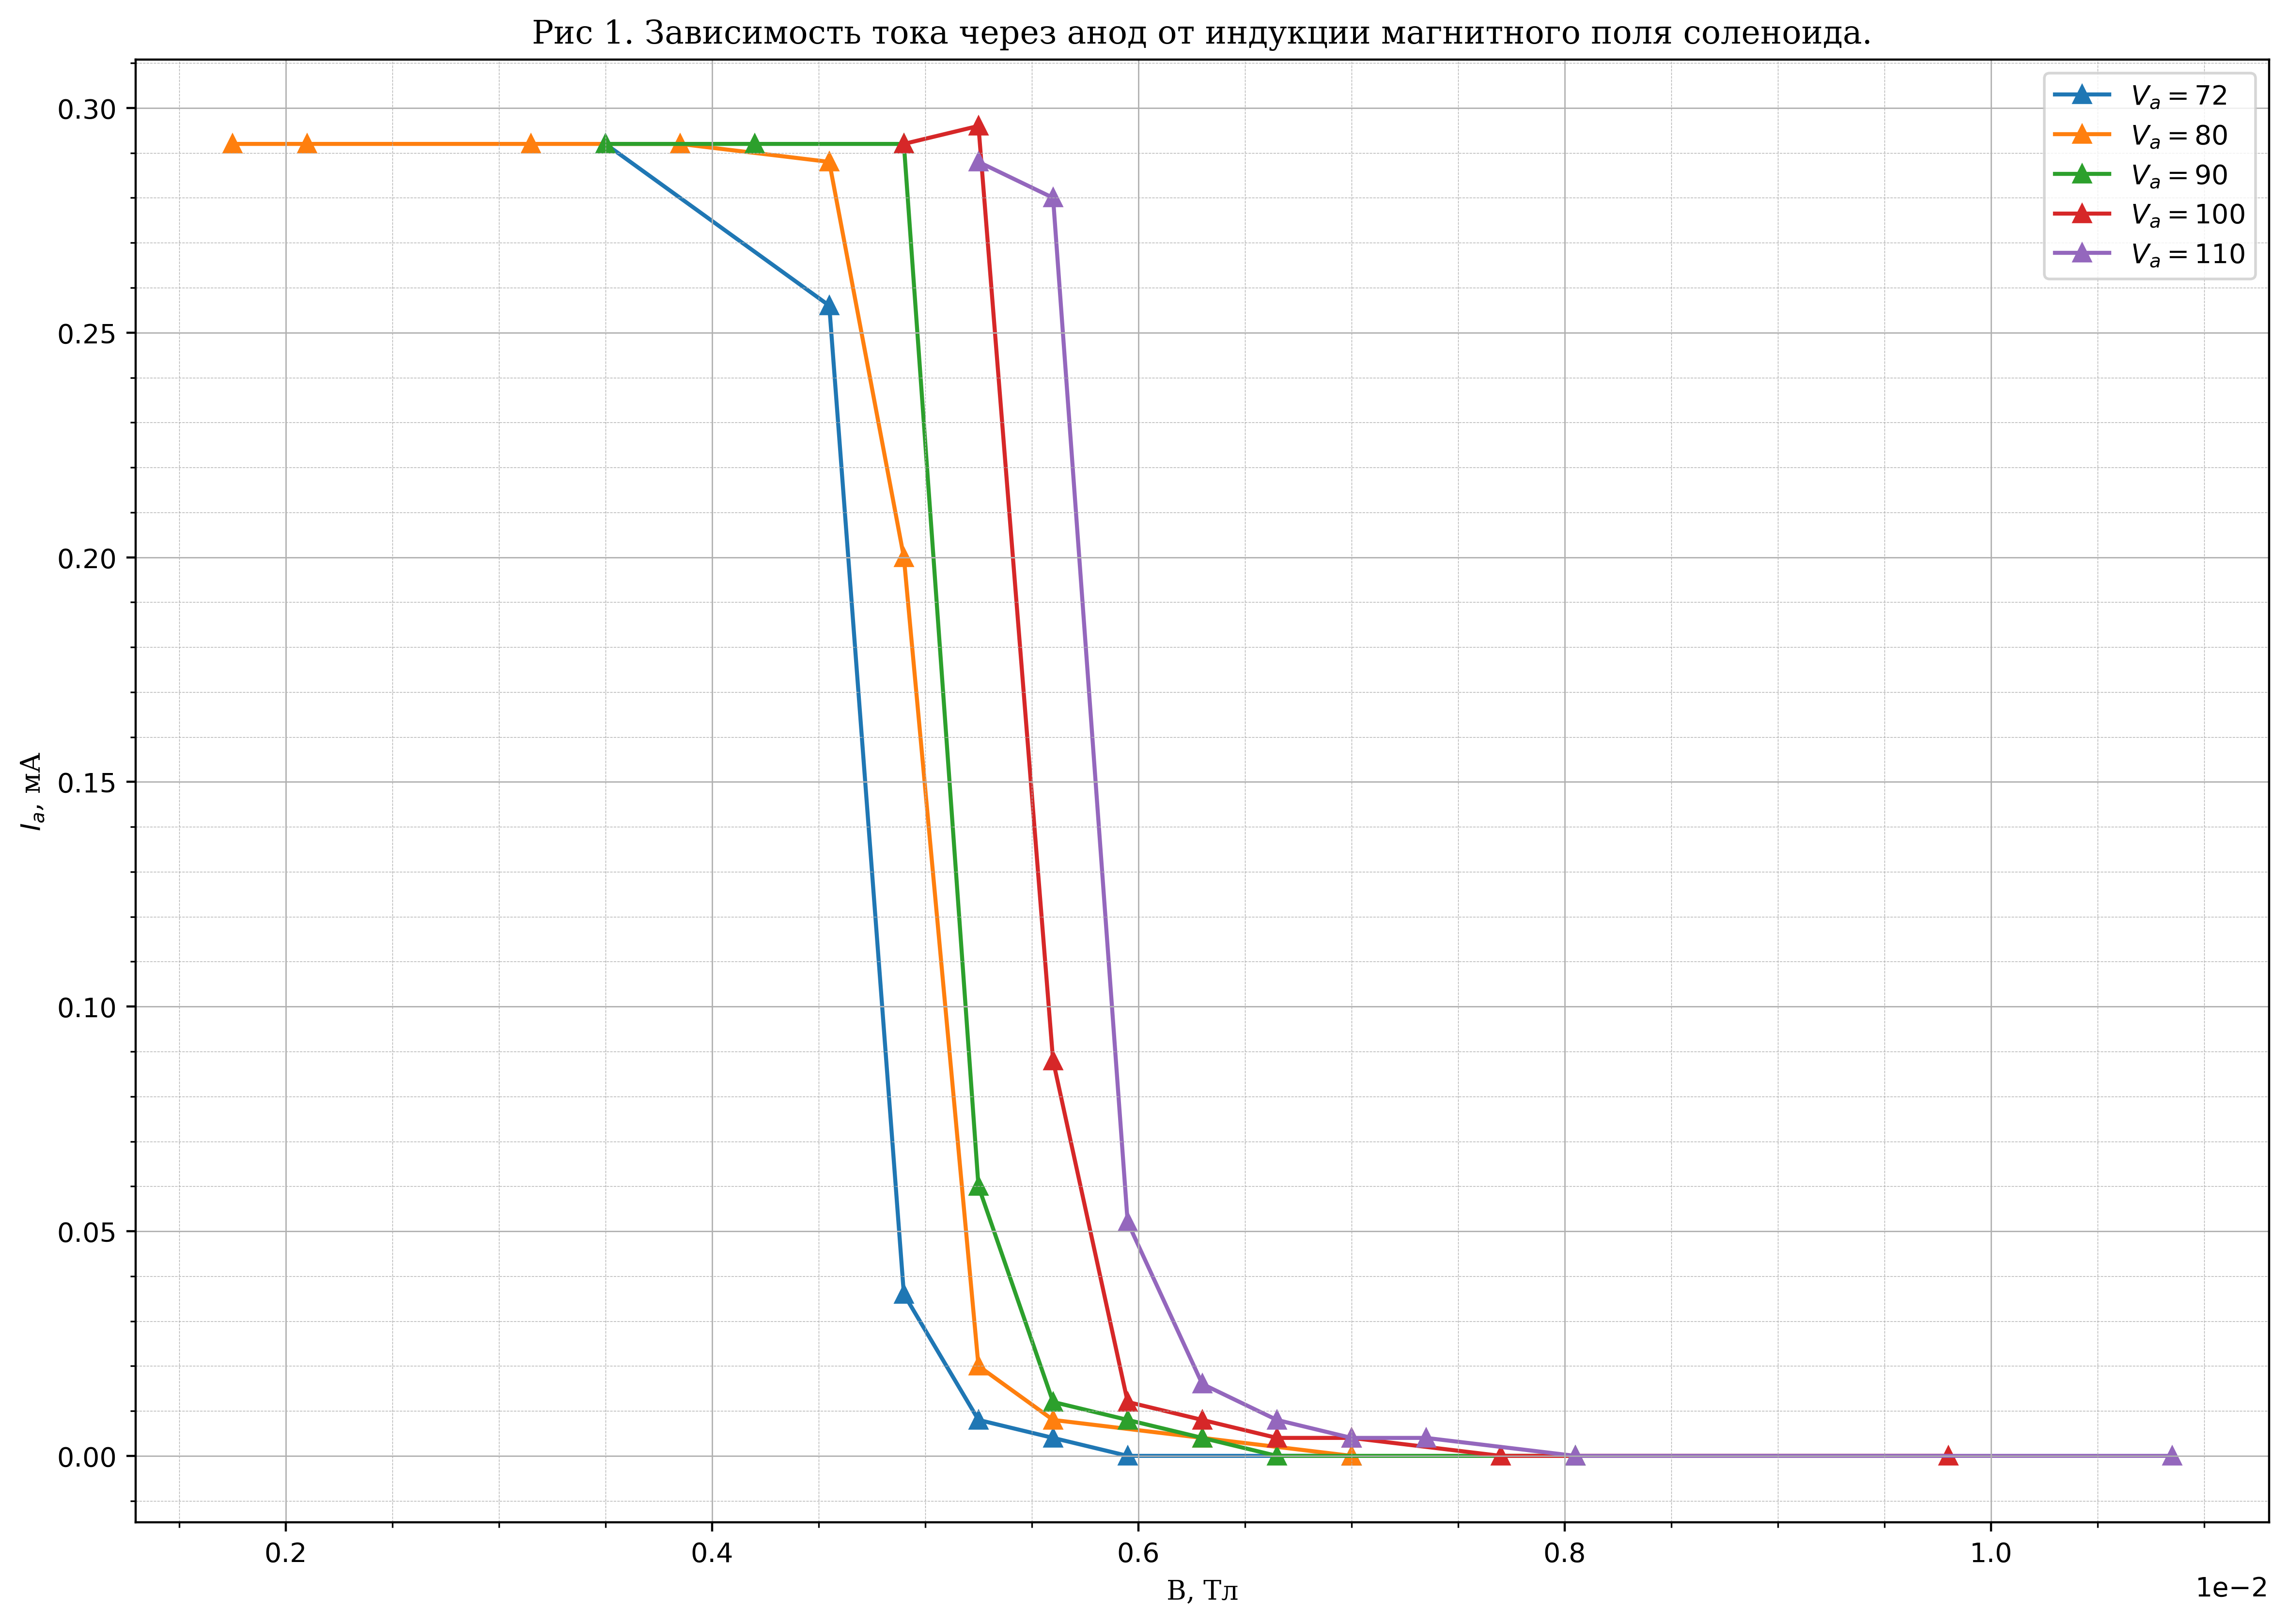

In [1]:
import numpy as np
import matplotlib.pyplot as plt

font = {'fontname': 'DejaVu Serif'}
fig = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')

ax = fig.add_subplot()
[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='-', linewidth=0.5, zorder=-1) for ax in fig.axes]
[ax.grid(which='minor', linestyle='--', linewidth=0.25, zorder=-1) for ax in fig.axes]
[ax.set_ylabel('$I_a$, мА', **font) for ax in fig.axes]
[ax.set_xlabel('B, Тл', **font) for ax in fig.axes]
[ax.ticklabel_format(axis='x', scilimits=[0, 0]) for ax in fig.axes]

K = 3.5e-2
B = {
    72: { 'Ia': np.array( [0.292,0.256,0.036,0.008,0.004,0,0] ),
          'B' : np.array( [0.0035,0.00455,0.0049,0.00525,0.0056,0.00595,0.007] ) },
    80: { 'Ia': np.array( [0.292,.292,.292,.292,.288,.2,.02,.008,.004,0 ] ),
           'B': np.array( [0.05, 0.06, .09,.11,.13,.14,.15,.16,.18,.20] ) * K },
    90: { 'Ia': np.array( [.292,.292,.292,.06,.012,.008,.004,0,0] ),
          'B': np.array( [.10,.12,.14,.15,.16,.17,.18,.19,.23] ) * K },
    100: { 'Ia': np.array( [.292,.296,.088,.012,.008,.004,.004,0,0] ),
          'B': np.array( [.14,.15,.16,.17,.18,.19,.20,.22,.28] ) * K },
    110: { 'Ia': np.array( [.288,.28,.052,.016,.008,.004,.004,0,0] ),
          'B': np.array( [.15,.16,.17,.18,.19,.20,.21,.23,.31] ) * K}
}

ax_count = 1
ax.set_title(f'Рис {ax_count}. Зависимость тока через анод от индукции магнитного поля соленоида.', **font); ax_count+=1
ax.plot(B[72]['B'], B[72]['Ia'], marker='^', label='$V_a = 72$', zorder=1)
ax.plot(B[80]['B'], B[80]['Ia'], marker='^', label='$V_a = 80$', zorder=1)
ax.plot(B[90]['B'], B[90]['Ia'], marker='^', label='$V_a = 90$', zorder=1)
ax.plot(B[100]['B'], B[100]['Ia'], marker='^', label='$V_a = 100$', zorder=1)
ax.plot(B[110]['B'], B[110]['Ia'], marker='^', label='$V_a = 110$', zorder=1)
ax.legend()

Коэффиценты прямой: k, s_k, b, s_b
4.523786828422912e-07	1.1689322221711982e-08	-8.405329289431278e-07	1.5883720124427866e-07
1.23E+11 +- 3.81E+07
Относительная пошрешность гамма = 2.58396840193001%
1.76E+11


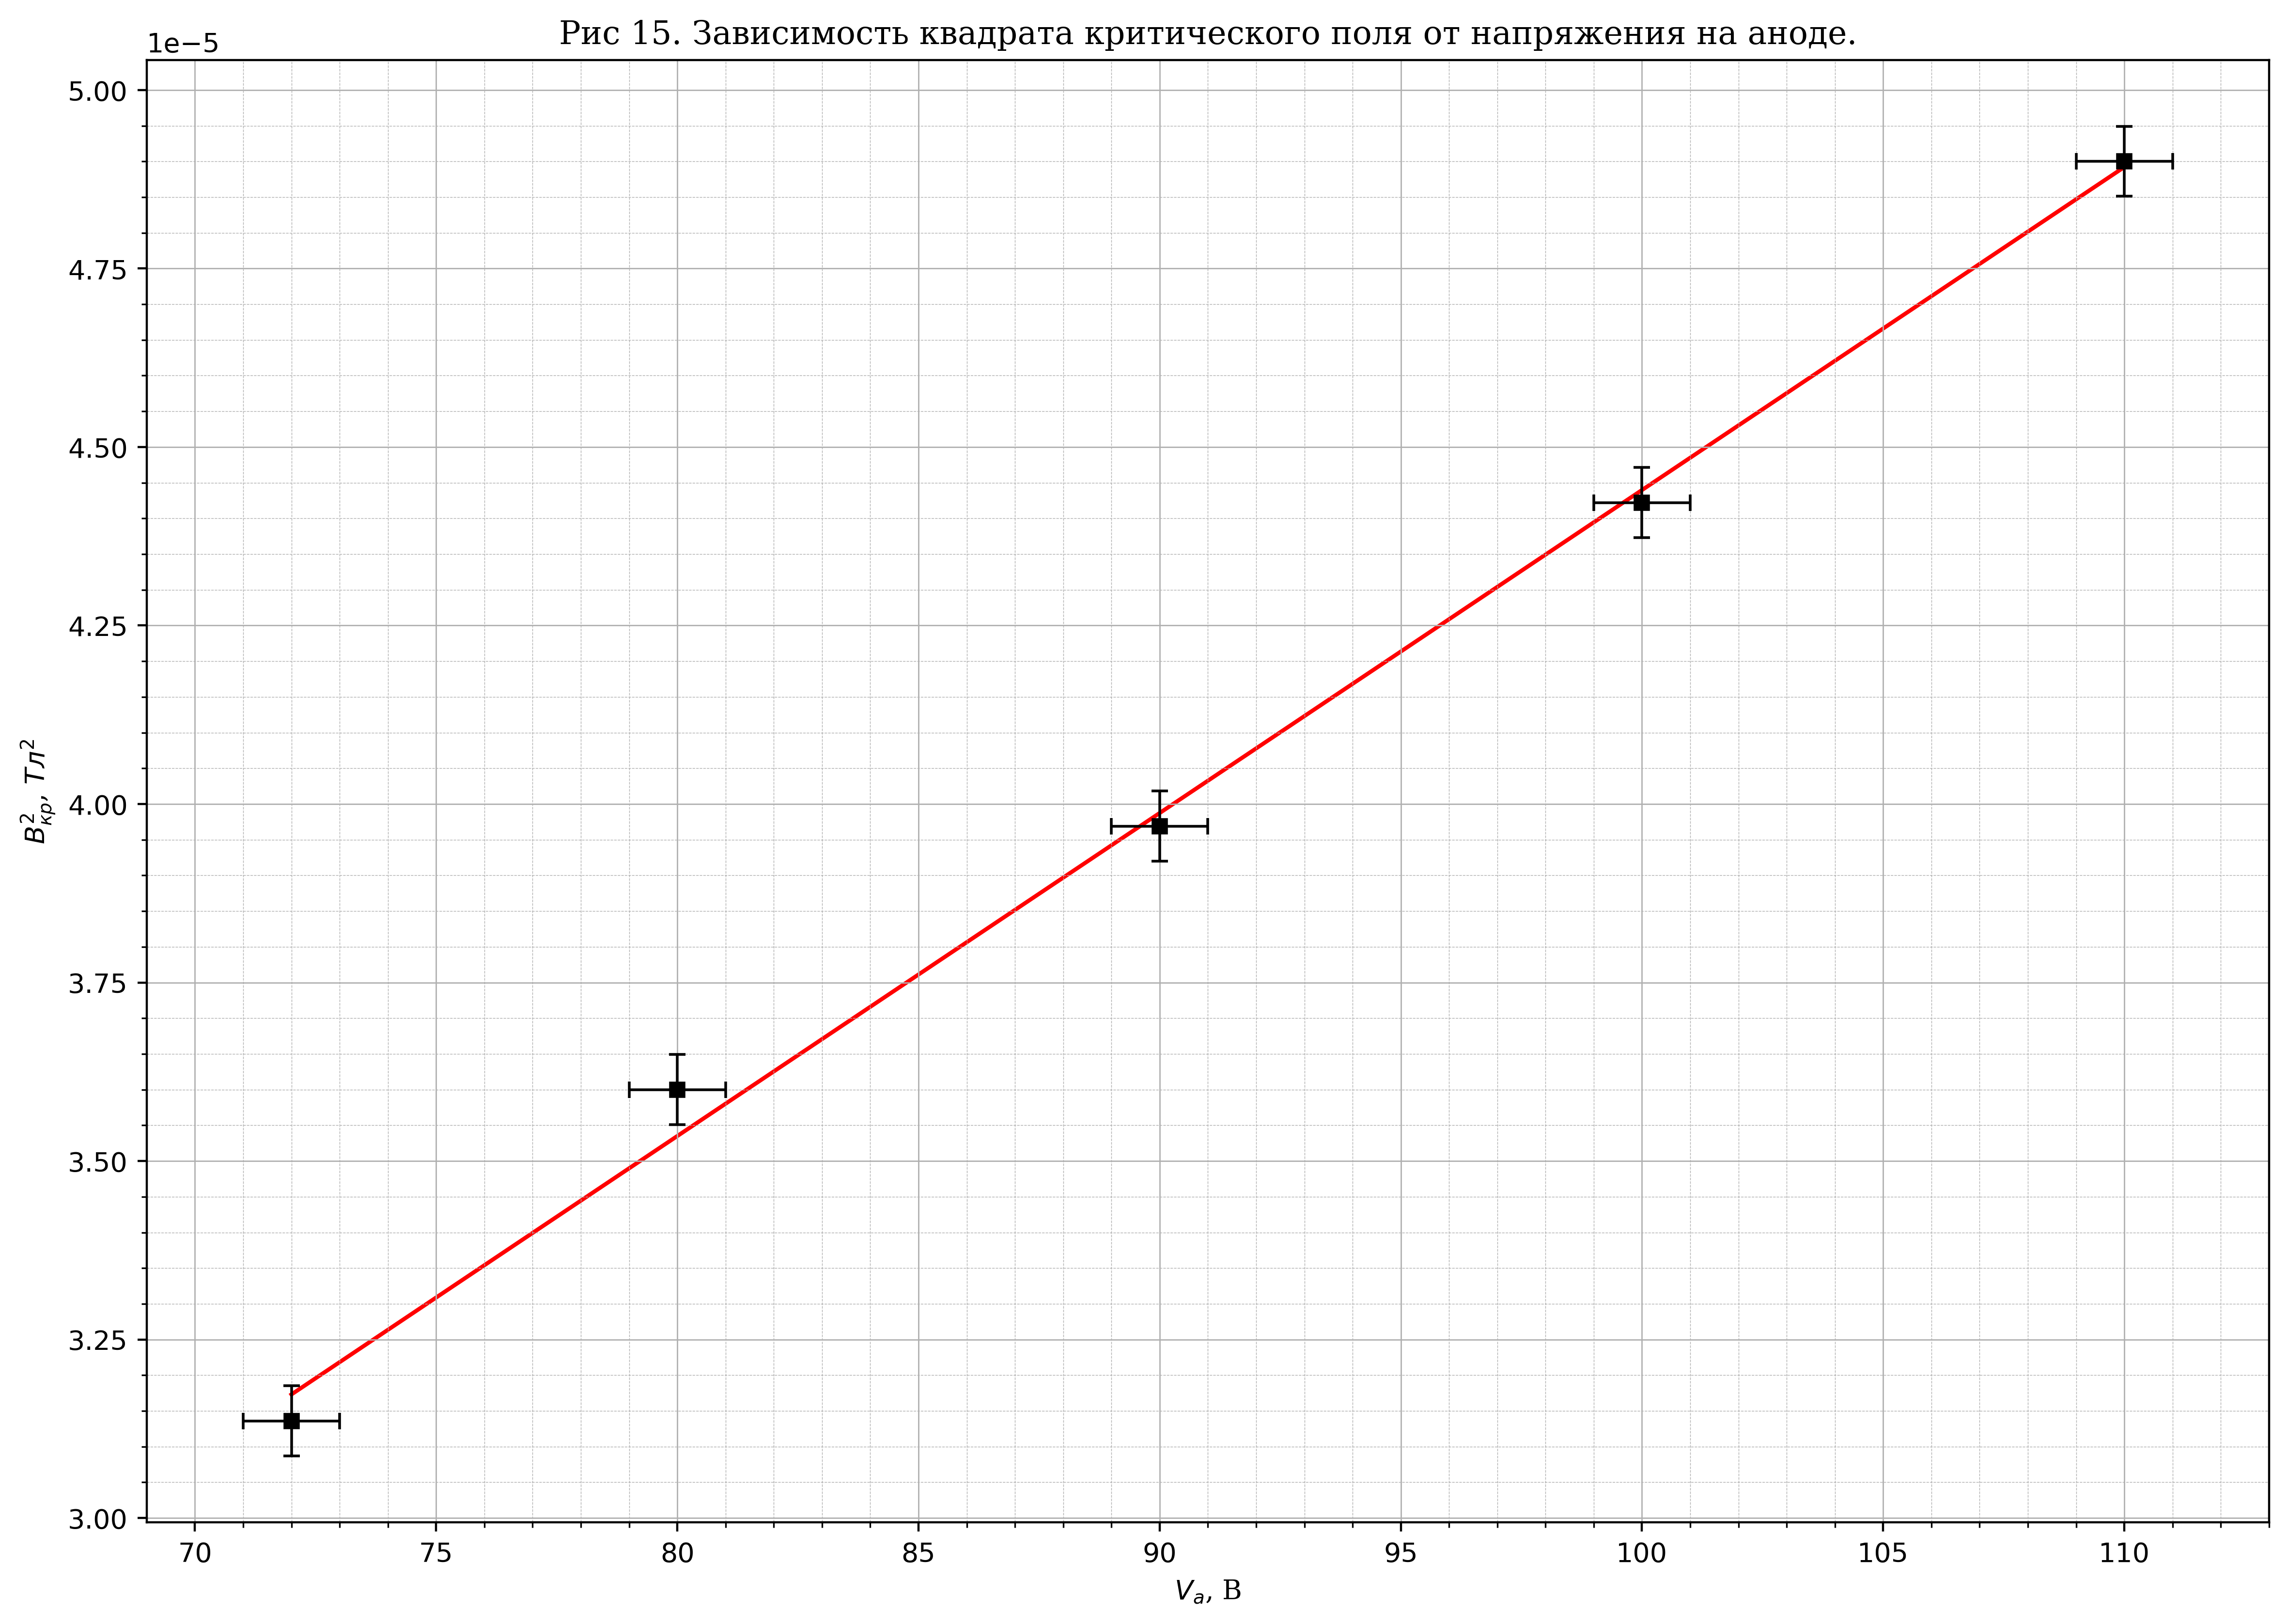

In [9]:
import numpy as np
from linls import *
Bs = np.array( [0.0056, .006,.0063,.00665,.007] )
Bs = Bs ** 2
Vs = np.array( [72, 80, 90, 100, 110] )

fig = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')

ax = fig.add_subplot()
[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='-', linewidth=0.5, zorder=-1) for ax in fig.axes]
[ax.grid(which='minor', linestyle='--', linewidth=0.25, zorder=-1) for ax in fig.axes]
[ax.set_ylabel('$B_{кр}^2$, $Тл^2$', **font) for ax in fig.axes]
[ax.set_xlabel('$V_a$, В', **font) for ax in fig.axes]
[ax.ticklabel_format(axis='y', scilimits=[0, 0]) for ax in fig.axes]


X_ERR = .5 * 2
Y_ERR = (2 * .01)**2 * K**2
ax.errorbar(Vs, Bs, fmt='ks', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3
)

ax.set_title(f'Рис {ax_count}. Зависимость квадрата критического поля от напряжения на аноде.', **font); ax_count+=1
(k, s_k, b, s_b) = lin_ls(Vs, Bs, through_null=False)
ax.plot(Vs, Vs * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

r_a = 12e-3
gamma = 8 / (k * r_a ** 2)
sigma_gamma = (8 / r_a) * (s_k / k**2)
print(f'{gamma:.2E} +- {sigma_gamma:.2E}')
print(f'Относительная пошрешность гамма = {s_k / k * 100}%')
actual = 1.602176634e-19 / 9.109383701528e-31
print(f'{actual:.2E}')

Погрешность суммы b1 + b2 = 0.0005999083905718754 
Коэффиценты прямой: k, s_k, b, s_b
0.025717255205279718	0.00019340343944688058	-0.002111317482928518	0.00033029925366323895
gamma = 1.95E+09 +- 2.94E+07
1.5040752825532882


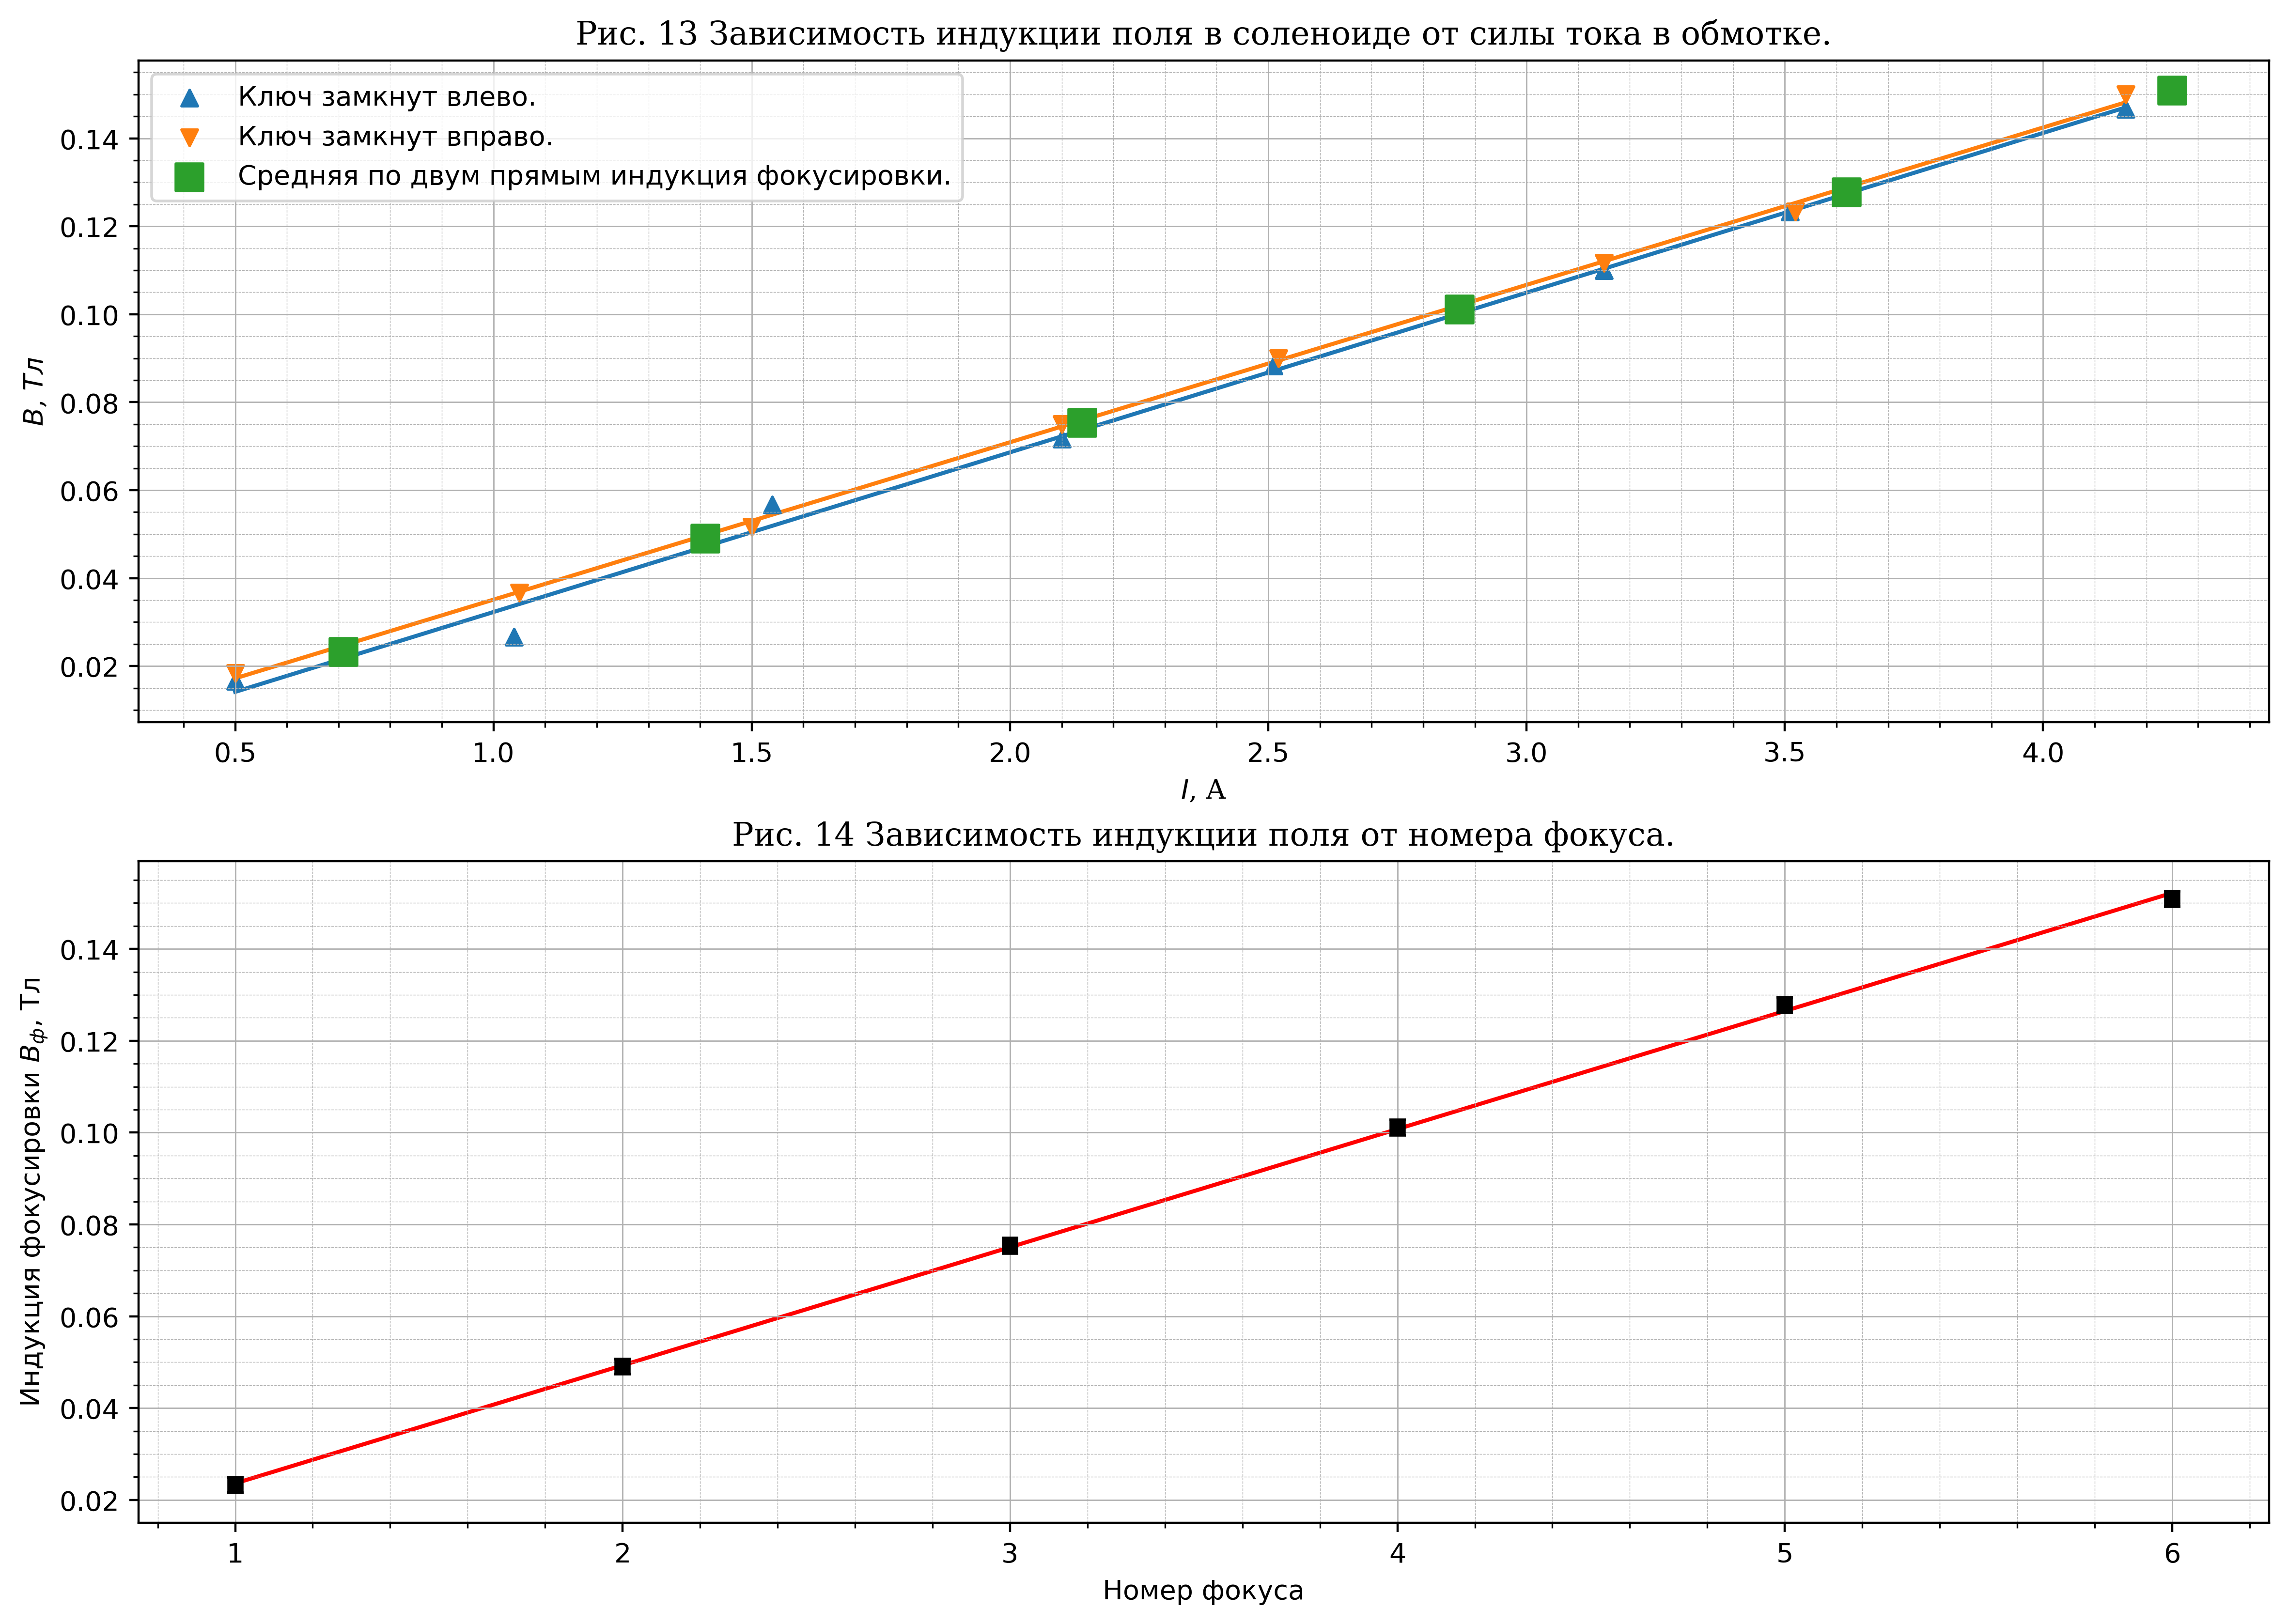

In [8]:
SN = 3000e-4 # м^2

Bs_left = np.array ( [
    52 - 47,
    46.5 - 38.5,
    50 - 33,
    48.5 - 27,
    50 - 23.5,
    51 - 18,
    51 - 14,
    53 - 9
] ) * 1e-3 / SN
Is_left = np.array( [
    0.5,
    1.04,
    1.54,
    2.10,
    2.51,
    3.15,
    3.51,
    4.16
])

Bs_right = np.array( [
    56.5 - 51,
    61 - 50,
    63 - 47.5,
    71.5 - 49,
    76 - 49,
    80 - 46.5,
    87.5 - 50.5,
    86 - 41
] ) * 1e-3 / SN
Is_right = np.array ( [
    0.5,
    1.05,
    1.5,
    2.1,
    2.52,
    3.15,
    3.52,
    4.16
] )


fig = plt.figure(figsize=(11.693, 8.268), dpi=400, layout='constrained')
spec = fig.add_gridspec(2, 1)
ax = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

[ax.minorticks_on() for ax in fig.axes]
[ax.grid(which='major', linestyle='-', linewidth=0.5, zorder=-1) for ax in fig.axes]
[ax.grid(which='minor', linestyle='--', linewidth=0.25, zorder=-1) for ax in fig.axes]
ax.set_ylabel('$B$, $Тл$', **font)
ax.set_xlabel('$I$, А', **font)
ax2.set_xlabel('Номер фокуса')
ax2.set_ylabel('Индукция фокусировки $B_ф$, Тл')
# [ax.ticklabel_format(axis='y', scilimits=[0, 0]) for ax in fig.axes]

ax.set_title(f'Рис. {ax_count} Зависимость индукции поля в соленоиде от силы тока в обмотке.', **font); ax_count+=1
ax.scatter(Is_left, Bs_left, marker='^', label='Ключ замкнут влево.')
(k1, s_k1, b1, s_b1) = lin_ls(Is_left, Bs_left, through_null=False)
ax.plot(Is_left, Is_left * k1 + b1, zorder=-1)

ax.scatter(Is_right, Bs_right, marker='v', label='Ключ замкнут вправо.')
(k2, s_k2, b2, s_b2) = lin_ls(Is_right, Bs_right, through_null=False)
ax.plot(Is_right, Is_right * k2 + b2, zorder=-1)
print(f'Погрешность суммы b1 + b2 = { 0.5 * np.sqrt(s_b1*s_b1 + s_b2*s_b2)} ')
ax.legend()

I_left = np.array ( [
    0.71,
    1.44,
    2.17,
    2.87,
    3.60,
    4.25
] )
B_left = I_left * k1 + b1
I_right = np.array ( [
    0.71,
    1.41,
    2.14,
    2.87,
    3.62,
    4.25
] )
B_right = I_right * k2 + b2
B = (B_left + B_right) / 2

ns = np.array( list(range(1, len(I_left) + 1)) )
#ax.scatter(I_left, B_left, label='Индукция фокусировки по "левой" прямой.', marker='^', s=100, zorder=2)
#ax.scatter(I_right, B_right, label='Индукция фокусировки по "правой" прямой.', marker='v', s=100, zorder=2)
ax.scatter(I_right, B, zorder=2, label='Средняя по двум прямым индукция фокусировки.', s=100, marker='s')
ax.legend()

ax2.set_title(f'Рис. {ax_count} Зависимость индукции поля от номера фокуса.', **font); ax_count+=1
X_ERR = 0
Y_ERR = 0.5 * 1e-3 / SN
ax2.errorbar(ns, B, fmt='ks', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3
)

(k3, s_k3, b3, s_b3) = lin_ls(ns, B, through_null=False)
ax2.plot(ns, ns * k3 + b3, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k3, s_k3, b3, s_b3, sep='\t')

V = 1.15e3  
L = 26.5e-2
gamma = 8 * np.pi * np.pi * V / (L * L * k3 * k3)
betta = 8 * np.pi * np.pi * V / (L * L)
sigma = 2 * betta * s_k3 / (k3*k3*k3)
print(f'gamma = {gamma:.2E} +- {sigma:.2E}')
print(2 * s_k3 / k3 * 100)